# Import Library 
*Import some library to get started*

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# The Data 
Create a dataframe to read the  train dataset. 


In [2]:
train = pd.read_csv(r'D:\Python DS analy\Internship\train.csv')

**Check the basic information about the dataset.**

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis 
EDA --Checking out missing data .


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


*return the number of missing values in Train dataset*


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data
We are using seaborn library. 

<AxesSubplot:>

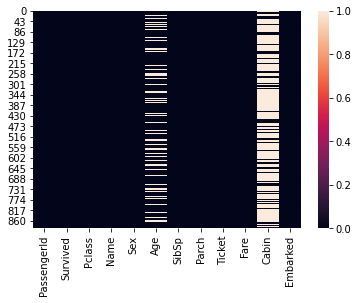

In [6]:
sns.heatmap(train.isnull())


If we glimpse at the data,we're missing some age information, we're missing a lot of cabin info and we're missing one row of embarked. We'll come back to this problem of missing data a little later. But before that lets focus on some exploratory data analysis on a visual level.

<AxesSubplot:xlabel='Survived', ylabel='count'>

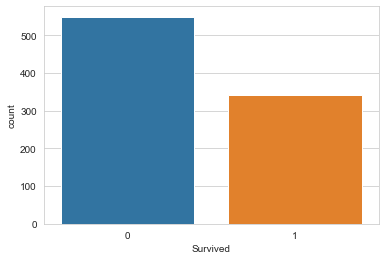

In [7]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',data=train)

As we can see, in our sample of the total data, more than 500 people lost their lives, and less than 350 people survived (in the sample of the data contained in train.csv).

<AxesSubplot:ylabel='Survived'>

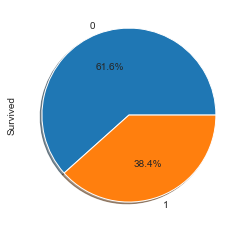

In [8]:
sns.set_style('whitegrid')
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(4,4))

As we can see, in our sample of the total data, 61.6% people lost their lives, and 38.4% people survived (in the sample of the data contained in train.csv).

<AxesSubplot:xlabel='Survived', ylabel='count'>

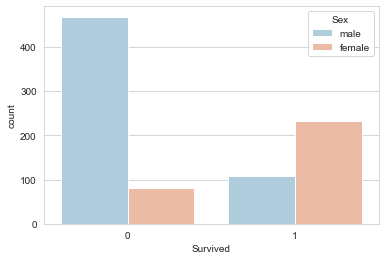

In [9]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

Over 400 men died, and around 100 survived. For women, less than a hundred died, and around 230 odd survived. Clearly, there is an imbalance here, as we expect.


<AxesSubplot:xlabel='Survived', ylabel='count'>

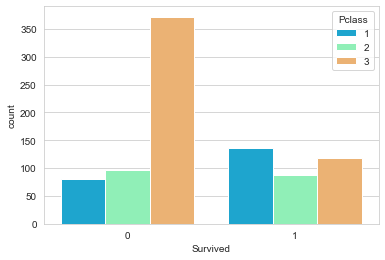

In [10]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

Also it looks like the people who did not survive were from the  part of 3rd class. People that did survive were from the higher classes.

Now lets try and understand the age of the onboard passengers.

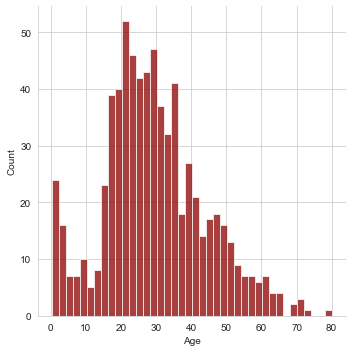

In [11]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=40)


There seems to be an interesting bi-modal distribution where there are quite a few young passengers between age 0 and 10. Then the average age tends to be around 20-35.

<AxesSubplot:>

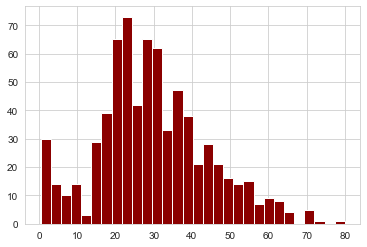

In [12]:
train['Age'].hist(bins=30,color='darkred')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

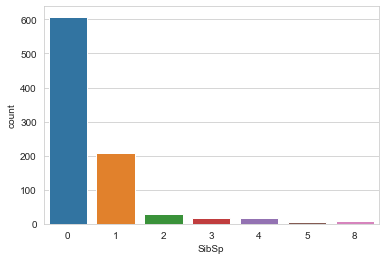

In [13]:
sns.countplot(x='SibSp',data=train)

1. Most of the passengers travel with 1 sibling/spouse.
2. Passengers having 1 sibling/spouse are more likely to survive   compared to those not.
3. For those more than 1 siblings/spouses, the information is insufficient to provide any insight.

<AxesSubplot:>

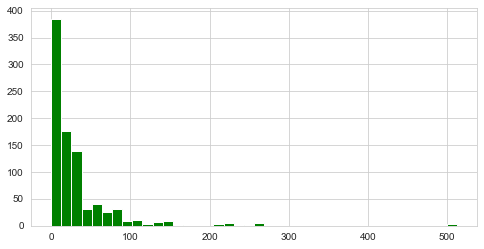

In [14]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Cleaning Data

As we saw earlier there are few columns that are missing some data. We need to clean our dataset before we begin to train our logistic regression model. Lets first try and fill in the missing age values. I'm going to do this by filling in the missing age with the mean age of the passenger class that the passenger belongs to.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

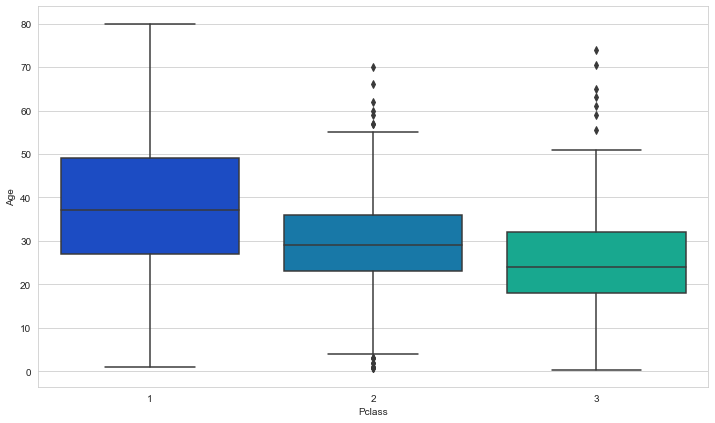

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
#Deleting Feature that we are not using for the Baseline

In [18]:
train.drop(['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'], axis=1, inplace=True )

In [19]:
train.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [20]:
train.isnull()

,Survived,Pclass,Sex,Age,Fare
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
886,False,False,False,False,False
887,False,False,False,False,False
888,False,False,False,True,False
889,False,False,False,False,False


In [21]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

Basically , Age is one of the feature having a missing value . 

Describe - Mean value is 29 .

In [22]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Fill missing value with mean value 

In [23]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [24]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In, above we can see there are no missing value in the dataset .


I will now convert some of the categorical features in the dataset into dummy variables that our machine learning model can accept.

In [25]:
l_sex_dummies=pd.get_dummies(train['Sex'],drop_first=True)

Now, I can Concat dummie dataset with train dataset.

In [26]:
train= pd.concat([train,l_sex_dummies],axis=1)

Check the basic information about the dataset.


In [27]:
train.head()

,Survived,Pclass,Sex,Age,Fare,male
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


DataSet concat and now, we can drop the Sex column fromt the dataset .

In [28]:
train.drop(['Sex'], axis=1, inplace=True )

Check the basic information about the dataset.

In [29]:
train.head()

,Survived,Pclass,Age,Fare,male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


# Train and build Classifier

Import Library StandardScaler

In [30]:
from sklearn.preprocessing import StandardScaler
sts =StandardScaler()

Now feature_Scale have two feature - Age and Fare .


In [31]:
feature_scale = ['Age','Fare']
train[feature_scale] = sts.fit_transform(train[feature_scale])

These 2 feature got feature skills . Now, as we already done with the data processing activity .



In [32]:
train.head()

,Survived,Pclass,Age,Fare,male
0,0,3,-0.592481,-0.502445,1
1,1,1,0.638789,0.786845,0
2,1,3,-0.284663,-0.488854,0
3,1,1,0.407926,0.420730,0
4,0,3,0.407926,-0.486337,1


Now, we can split the dataset into X and Y variable .
Basically , Survived(x) is a Target variable .

In [33]:
X= train.drop(['Survived'],axis=1)
y=train['Survived']

Import Some Library .
GridSearchCV-Used for Model selection technique .
these three are model DecisionTreeClassifier,KNeighborsClassifier,SVC,
I dodn't know which model is fit for that dataset what we do used  GridSearchCV to find the best model.

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

 We used Model Selection Technique .
    In this there are key and value . 
    keys are  DecisionTreeClassifier,KNeighborsClassifier,SVC.
    and values are Model and param 
    GridSearchCV is used  to find the best best hyper parameter used for given model . 

In [35]:
#create Param
model_param ={
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion':['gini','entropy']
        }
    },
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
        }
    },
        'SVC':{
        'model':SVC(),
        'param':{
            'kernel':['rbf','linear','sigmoid'],
            'C': [0.1, 1, 10, 100]
        }
    }
         
}

Creating a for loop here i am passing these values to the GridSearch class .  
each model iterate and get the accuracy. and stored in the score variable.

In [36]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

Score of individual models this is the command .
I'm creating a new dataframe -df_model_score to get this score value .

In [37]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,DecisionTreeClassifier,0.776731,{'criterion': 'gini'}
1,KNeighborsClassifier,0.802492,{'n_neighbors': 5}
2,SVC,0.811481,"{'C': 100, 'kernel': 'rbf'}"


As per result , we decided SVC is best model to predict 

In [38]:
model_svc = SVC(C= 100, kernel= 'rbf')

In [39]:
model_svc.fit(X, y)

SVC(C=100)

Now, I have to predict test feature . Create a dataframe to read the test dataset.

In [40]:
test = pd.read_csv(r'D:\Python DS analy\Internship\test.csv')

In [41]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Drop Unwanted feature

In [42]:
df = test.drop(['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'], axis=1 )

In [43]:
df.isnull().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

In above , we saw some missing value . 
Now, we can fill this missing values with mean values.

In [44]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

I will now convert some of the categorical features in the dataset into dummy variables that our machine learning model can accept.
And afterthat, we can drop sex column from the dataset .

In [45]:
l_sex_dummies=pd.get_dummies(df['Sex'],drop_first=True)
df= pd.concat([df,l_sex_dummies],axis=1)
df.drop(['Sex'], axis=1, inplace=True )

In [46]:
df.head()

,Pclass,Age,Fare,male
0,3,34.5,7.8292,1
1,3,47.0,7.0000,0
2,2,62.0,9.6875,1
3,3,27.0,8.6625,1
4,3,22.0,12.2875,0


Implement feature scale on age and fare feature

In [47]:
df[feature_scale] = sts.fit_transform(df[feature_scale])

In [48]:
df.head()

,Pclass,Age,Fare,male
0,3,0.334993,-0.498407,1
1,3,1.325530,-0.513274,0
2,2,2.514175,-0.465088,1
3,3,-0.259330,-0.483466,1
4,3,-0.655545,-0.418471,0


Now, we can predict the model with Svc 

In [49]:
y_predicted = model_svc.predict(df)

Create a dataframe submission which holds the passangerId and Survived .

In [50]:
submission = pd.DataFrame({
        "PassengerId": test['PassengerId'],
        "Survived": y_predicted
    })

Now Predict is done we can print the data 

In [51]:
print(submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


Now, save this dataframe in csv file . 

In [52]:
submission.to_csv('submission_for_internship.csv', index=False)